In [19]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
from keras import losses

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

In [32]:
# function to plot dynamic graphs

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw() # A pilot function to - Redraw the current figure and
                      # to update a figure that has been altered, 

In [3]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Shape of training data : ",x_train.shape)
print("Shape of test data : ",x_test.shape)

Shape of training data :  (60000, 28, 28)
Shape of test data :  (10000, 28, 28)


In [5]:
# Converting the dataset of (28*28) into 1D vector 0f 786 dimension

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

In [6]:
print("Shape of training data : ",x_train.shape)
print("Shape of test data : ",x_test.shape)

Shape of training data :  (60000, 784)
Shape of test data :  (10000, 784)


In [7]:
# Normalizing the dataset
# X = (x - Xmin) / (Xmax - Xmin)

print(x_train.max() , x_train.min(), x_test.max(), x_test.min()) 

255 0 255 0


In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Converting the labels into categorical columns

print("Class label for the first image : ", y_train[0])

'''Converting the class labels into the categorical columns'''
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test  = np_utils.to_categorical(y_test, num_classes=10)

print("Class label  for \"5\" after categorical conersion : ",y_train[0])

Class label for the first image :  5
Class label  for "5" after categorical conersion :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [28]:
#  model parameters
output_dim = 10               # final output 
input_dim = x_train.shape[1]  # 786 initla input dimension
batch_size = 128 
nb_epoch = 20

### Model 1: Simple Softmax Classifier

In [13]:
# The Sequential model is a linear stack of layers.
model = Sequential()
# Add layers via the .add() method:
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before taining configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = nb_epoch,
                    verbose = 1 , validation_data = (x_test, y_test)) 



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 15s 257us/step - loss: 1.2865 - acc: 0.6982 - val_loss: 0.8131 - val_acc: 0.8312
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.7162 - acc: 0.8418 - val_loss: 0.6088 - val_acc: 0.8626
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.5874 - acc: 0.8604 - val_loss: 0.5270 - val_acc: 0.8741
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.5258 - acc: 0.8690 - val_loss: 0.4813 - val_acc: 0.8820
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4883 - acc: 0.8754 - val_loss: 0.4518 - val_acc: 0.8868
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.4625 - acc: 0.8801 - val_loss: 0.4301 - val_acc: 0.8893
Epoch 7/20
60000/60000

In [23]:
score = model.evaluate(x_test , y_test, verbose=1)  # it gives the last epoch results 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 53us/step
Test score: 0.33646477186083795
Test accuracy: 0.909


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
# To get the Various model output parameters for each epoch:

vy = history.history['val_loss']
ty = history.history['loss']

print("Validation Loss : \n",vy)
print("Loss : \n",ty)

Validation Loss : 
 [0.8131389778137207, 0.6087657636642456, 0.5269974497795105, 0.48132611627578736, 0.45183863878250125, 0.43014442682266235, 0.4141029287338257, 0.4011671630859375, 0.39077147283554076, 0.38194064292907715, 0.37471455965042116, 0.36828509445190427, 0.3626304751873016, 0.35768257064819337, 0.3529754294157028, 0.3492005617618561, 0.34578497972488403, 0.3421472666501999, 0.3391822957277298, 0.33646477274894715]
Loss : 
 [1.286501220925649, 0.7161753566424052, 0.5874353148142497, 0.5258194129625956, 0.48831187682151794, 0.46247483682632445, 0.4433107550144196, 0.4283879516283671, 0.4163084792931875, 0.4063305030663808, 0.39781303400993345, 0.39047930781046547, 0.3840993232727051, 0.3783931321461995, 0.37339335169792176, 0.36881661240259805, 0.3646796360174815, 0.3609231772740682, 0.35745922271410624, 0.3543131185054779]


<Figure size 1440x720 with 0 Axes>

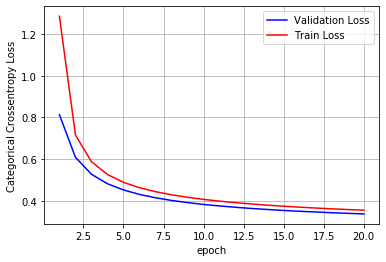

In [34]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1)) # list of epoch numbers

plt_dynamic(x, vy, ty, ax)

 <h3> Model 2 : MLP + Sigmoid activation + SGDOptimizer </h3>

In [39]:
from keras import activations,losses,optimizers,metrics


In [36]:
# input layer + 2 hidden layer + output alyer + softmax

model_sigmoid = Sequential()

model_sigmoid.add(Dense(512, activation='sigmoid',input_shape = (input_dim,)))
model_sigmoid.add(Dense(128 , activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))


In [37]:
model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x=x_train ,y=y_train , batch_size=batch_size, epochs = nb_epoch, 
                            verbose=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 175us/step - loss: 2.2730 - acc: 0.2125 - val_loss: 2.2261 - val_acc: 0.2657
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 2.1854 - acc: 0.4400 - val_loss: 2.1324 - val_acc: 0.5668
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 2.0770 - acc: 0.5884 - val_loss: 2.0013 - val_acc: 0.6245
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 1.9220 - acc: 0.6520 - val_loss: 1.8130 - val_acc: 0.6844
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 1.7125 - acc: 0.6912 - val_loss: 1.5768 - val_acc: 0.7243
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 1.4732 - acc: 0.7257 - val_loss: 1.3360 - val_acc: 0.7546
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 1.2504 - acc: 0.7548 - val_loss: 1.1330 - val_a

In [47]:
score = model_sigmoid.evaluate(x=x_test, y=y_test, verbose=1)

print("\nTest score: : ",score[0])
print("Test Accuracy : ",score[1])


10000/10000 [==============================] - 1s 148us/step

Test score: :  0.458932283616066
Test Accuracy :  0.8769


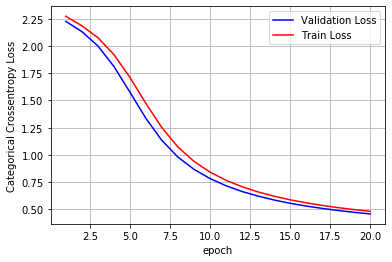

In [48]:
vy = history.history['val_loss']
ty = history.history['loss']
x  = list(range(1,nb_epoch+1))

fig , ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel("Categorical Crossentropy Loss")

plt_dynamic(x,vy,ty,ax)

In [49]:
model_sigmoid.get_config() # to see how the model was trained

{'name': 'sequential_2',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'units': 128,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': '

In [63]:
# Getting the weights alloted, after 20 ecochs

w_after = model_sigmoid.get_weights()

# All the req. 3 layers of weights are stored in even slots
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

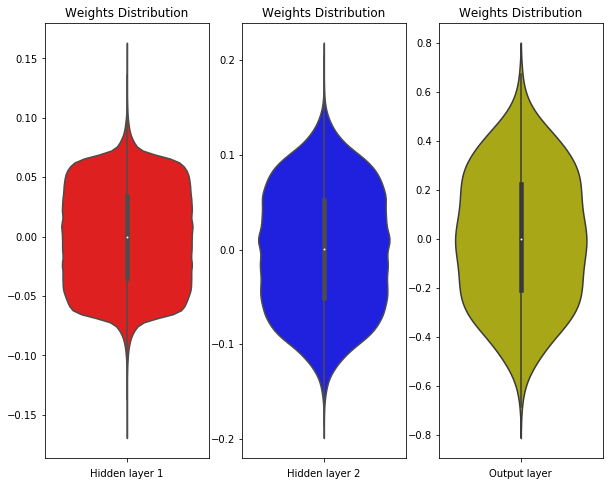

In [69]:
# Plotting all the weights for the SCANITY TESTING for weights distribution

plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
sns.violinplot(y=h1_w , color='r')
plt.xlabel("Hidden layer 1")
plt.title("Weights Distribution")

plt.subplot(1,3,2)
sns.violinplot(y=h2_w , color='b')
plt.xlabel("Hidden layer 2")
plt.title("Weights Distribution")

plt.subplot(1,3,3)
sns.violinplot(y=out_w , color='y')
plt.xlabel("Output layer")
plt.title("Weights Distribution")

plt.show()

<h2>Model 3 : MLP + Sigmoid activation + ADAM </h2>

In [71]:
model_sigmoid = Sequential()

model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128 ,  activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x=x_test, y=y_test, batch_size=batch_size, epochs=nb_epoch,
                            verbose=1, validation_data=(x_test,y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 102us/step - loss: 0.0524 - acc: 0.9862 - val_loss: 0.0472 - val_acc: 0.9880
Epoch 2/20
10000/10000 [==============================] - 0s 44us/step - loss: 0.0423 - acc: 0.9904 - val_loss: 0.0329 - val_acc: 0.9936
Epoch 3/20
10000/10000 [==============================] - 0s 41us/step - loss: 0.0343 - acc: 0.9923 - val_loss: 0.0307 - val_acc: 0.9944
Epoch 4/20
10000/10000 [==============================] - 0s 43us/step - loss: 0.0300 - acc: 0.9941 - val_loss: 0.0241 - val_acc: 0.9965
Epoch 5/20
10000/10000 [==============================] - 0s 42us/step - loss: 0.0251 - acc: 0.9957 - val_loss: 0.0196 - val_acc: 0.9978
Epoch 6/20
10000/10000 [==============================] - 0s 42us/step - loss: 0.0207 - acc: 0.9968 - val_loss: 0.0184 - val_acc: 0.9975
Epoch 7/20
10000/10000 [==============================] - 0s 42us/step - loss: 0.0177 - acc: 0.9977 - val_loss: 0.0144 - val_ac

In [74]:
score = model_sigmoid.evaluate(x_test,y_test, verbose=1)

print("\nTest loss :",score[0])
print("Test accuracy : ", score[1])


10000/10000 [==============================] - 1s 120us/step

Test loss : 0.04630785330124199
Test accuracy :  0.9904


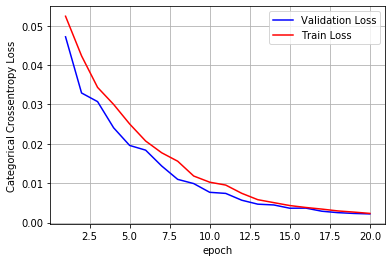

In [76]:
x  = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig , ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

plt_dynamic(x,vy,ty,ax)

In [81]:
w_after = model_sigmoid.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)   # (784,512) 
h2_w = w_after[2].flatten().reshape(-1,1)   # (512,128)
out_w = w_after[4].flatten().reshape(-1,1)   # (128,10)

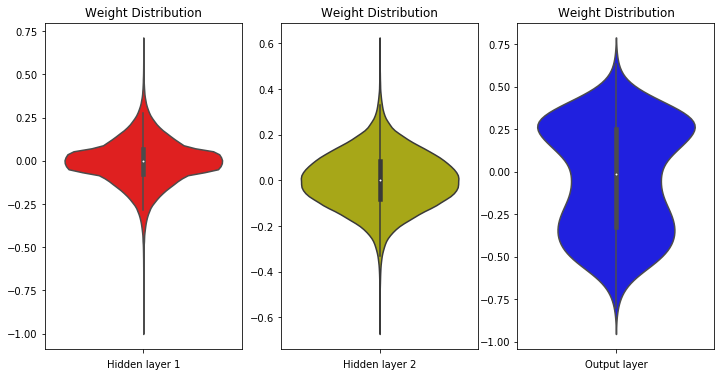

In [91]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.violinplot(y=h1_w , color='r')
plt.xlabel("Hidden layer 1")
plt.title("Weight Distribution")

plt.subplot(1,3,2)
sns.violinplot(y=h2_w , color='y')
plt.xlabel("Hidden layer 2")
plt.title("Weight Distribution")

plt.subplot(1,3,3)
sns.violinplot(y=out_w , color='b')
plt.xlabel("Output layer")
plt.title("Weight Distribution")

plt.show()

<h2> Model 4: MLP + ReLU +SGD </h2>

In [92]:
# for relu activation we use "He" initializers for weight

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=
                     RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )

history = model_relu.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=nb_epoch,
                        verbose=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.7363 - acc: 0.7981 - val_loss: 0.3846 - val_acc: 0.8920
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3515 - acc: 0.9004 - val_loss: 0.2972 - val_acc: 0.9133
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2894 - acc: 0.9177 - val_loss: 0.2597 - val_acc: 0.9253
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2554 - acc: 0.9275 - val_loss: 0.2381 - val_acc: 0.9307
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2321 - acc: 0.9340 - val_loss: 0.2190 - val_acc: 0.9361
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2138 - acc: 0.9395 - val_loss: 0.2055 - val_acc: 0.9399
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1991 - acc: 0.9437 - val_loss: 0.1937 - val_acc

In [95]:
score = model_relu.evaluate(x_test,y_test, verbose=1)
print("\nTest Loss : ",score[0])
print("Test Accuracy : ",score[1])

10000/10000 [==============================] - 1s 55us/step

Test Loss :  0.12417117748260498
Test Accuracy :  0.9629


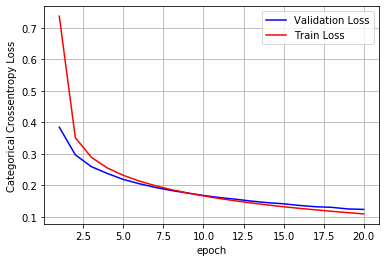

In [97]:
x  = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig , ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

plt_dynamic(x,vy,ty,ax)



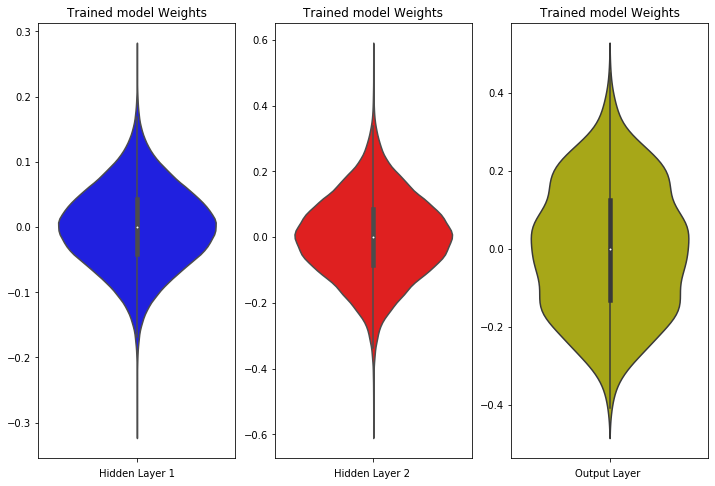

In [98]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Model 5: MLP + ReLU + ADAM </h2>

In [100]:
model_relu = Sequential()

model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), 
                    kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125)))
model_relu.add(Dense(output_dim, activation='softmax'))


In [102]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                         verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2260 - acc: 0.9319 - val_loss: 0.1122 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0845 - acc: 0.9746 - val_loss: 0.0789 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0529 - acc: 0.9839 - val_loss: 0.0758 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0353 - acc: 0.9895 - val_loss: 0.0752 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0752 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0743 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0163 - acc: 0.9947 - val_loss: 0.0772 - va

In [103]:
score = model_relu.evaluate(x_test,y_test,verbose=1)
print("\nTest loss : ",score[0])
print("Test Accuracy : ",score[1])

10000/10000 [==============================] - 2s 156us/step

Test loss :  0.09695222010005873
Test Accuracy :  0.9808


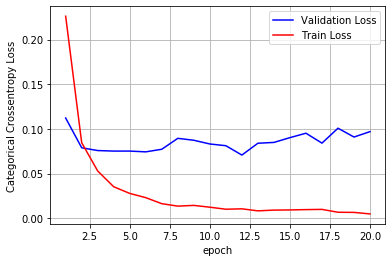

In [104]:
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig , ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

plt_dynamic(x,vy,ty,ax)


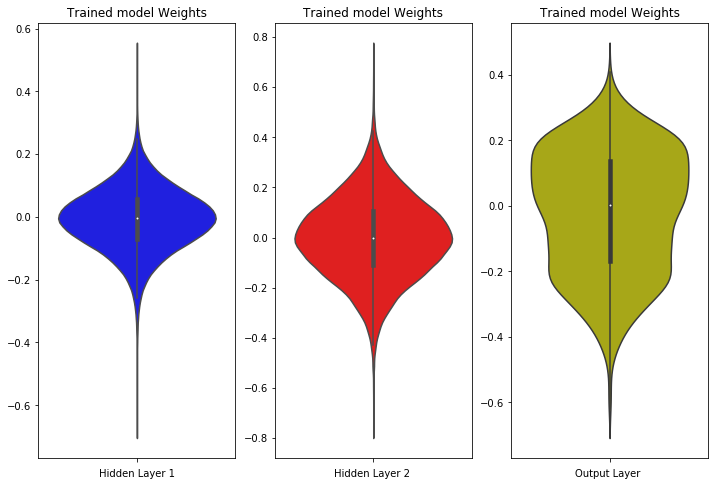

In [107]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Model 6: MLP + Batch-Norm on hidden Layers+ Sigmoid + Adam

In [109]:
from keras.layers.normalization import BatchNormalization

In [110]:
# Batch normalization is done to the input of layer after summation and BEFORE ACTICATION fn
# Batch Normalization is aapplied inly on the HIDDEN LAYERS.
model_batch = Sequential()

# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)
model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=
                      RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [111]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=nb_epoch, 
                         verbose=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3004 - acc: 0.9110 - val_loss: 0.2055 - val_acc: 0.9399
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1758 - acc: 0.9482 - val_loss: 0.1784 - val_acc: 0.9463
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1387 - acc: 0.9586 - val_loss: 0.1501 - val_acc: 0.9564
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1159 - acc: 0.9654 - val_loss: 0.1309 - val_acc: 0.9626
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0962 - acc: 0.9711 - val_loss: 0.1227 - val_acc: 0.9643
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0825 - acc: 0.9748 - val_loss: 0.1211 - val_acc: 0.9647
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0688 - acc: 0.9783 - val_loss: 0.1161 - val_acc

In [112]:
score = model_batch.evaluate(x_test,y_test,verbose=1)
print("\nTest Loss : ",score[0])
print("Test Accuracy : ",score[1])

10000/10000 [==============================] - 1s 64us/step

Test Loss :  0.11470814741220092
Test Accuracy :  0.972


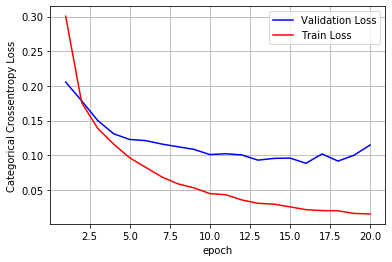

In [113]:
x  = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig , ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

plt_dynamic(x,vy,ty,ax)

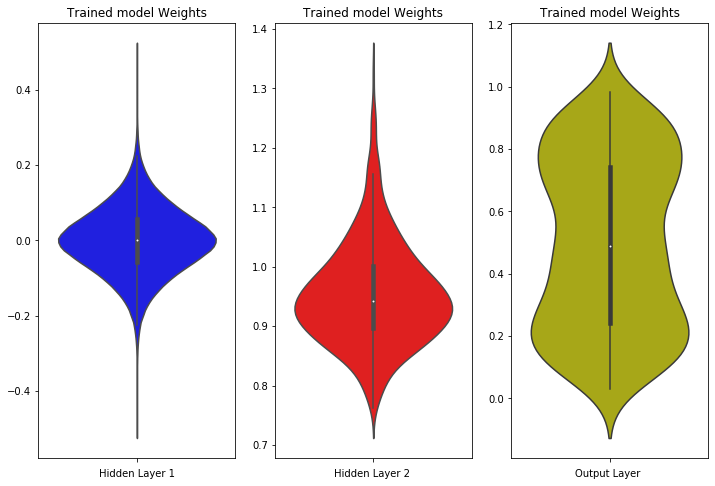

In [114]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Model 7: MLP + Dropout + AdamOptimizer </h2>

In [117]:
from keras.layers import Dropout

In [118]:
# DROPOUT applied to the output hidden layer after summation and ACTICATION fn
# DROPOUT is aapplied inly on the HIDDEN LAYERS.

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [119]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, 
                         verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.6531 - acc: 0.7992 - val_loss: 0.2863 - val_acc: 0.9142
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4210 - acc: 0.8708 - val_loss: 0.2558 - val_acc: 0.9246
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3857 - acc: 0.8824 - val_loss: 0.2403 - val_acc: 0.9271
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3526 - acc: 0.8929 - val_loss: 0.2251 - val_acc: 0.9356
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3366 - acc: 0.8970 - val_loss: 0.2230 - val_acc: 0.9338
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3173 - acc: 0.9031 - val_loss: 0.2032 - val_acc: 0.9393
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3091 - acc: 0.9066 - val_loss: 0.1911 - val_acc

Test score: 0.1069453983752057
Test accuracy: 0.969


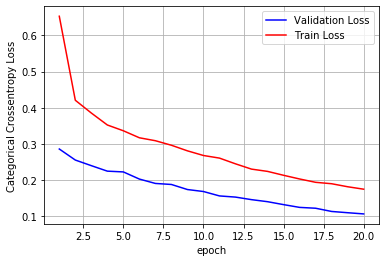

In [121]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

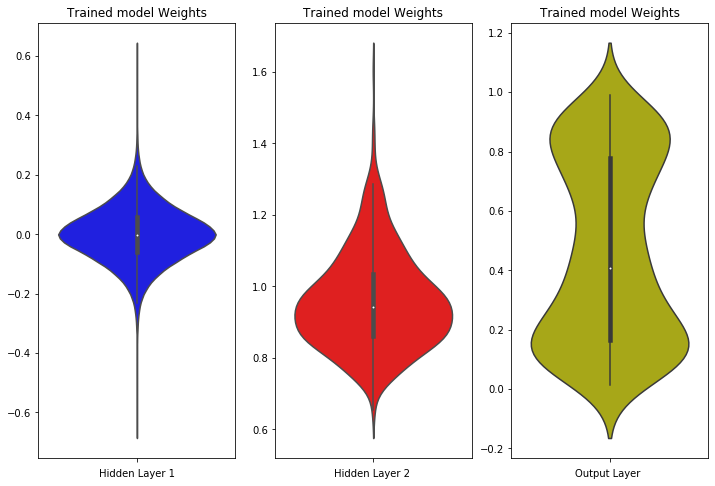

In [122]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

#### Some hyper parameter list - 
1. No of Hidden layers
2. No of activation(Neurons) units in each layers
3. Type of activation to use (relu,sigmoid,tanh etc)
4. Dropout rate etc....

###### (all the hyperpatameter are required to be tuned in actual model)


#### 1. Tuning the ACTIVATION FUNCTION type hyperparameter

In [127]:
def best_hyperparameters(activ):
    '''Function that will create model and compile it'''
    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), 
                    kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [129]:
# Keras using wrapper on top of it to connect with sklearn
# This makes the keras and sklearn to work together
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

activ = ['sigmoid' , 'relu']

model = KerasClassifier(build_fn=best_hyperparameters ,batch_size=batch_size, epochs=nb_epoch, verbose=1)
param_grid = dict(activ=activ)

grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [131]:
grid_result = grid.fit(x_train, y_train)

In [133]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))